# 5. k-Means-Algorithm


## Read the Data


In [11]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

path = os.getcwd() + os.sep + "data_6.csv"
data = np.loadtxt(path)

## 2. Define the Distance-Metric


In [6]:
def distance_measuring(data_point, cluster_center):
    return np.linalg.norm(data_point - cluster_center)

## 3. Implement the k-Means-Algorithum
Implement the k-means algorithm. The return should contain the following information:
1. A list or array that stores the cluster ID for each data point,
2. the position of the cluster centers.

In [7]:
def k_means_shorter(data, k, max_iter = 20):
    X = data.copy()

    np.random.seed(1)


    labels = []

    cluster_centers = X[np.random.choice(X.shape[0], k, replace = False)]

    for _ in range(max_iter):
        distances = np.array([[distance_measuring(X[i], cc) for cc in cluster_centers ]for i in range(X.shape[0])])
        labels = np.argmin(distances, axis =1)

        new_centers = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        if np.allclose(cluster_centers, new_centers):
            break
        
        cluster_centers = new_centers
    
    # Return the labels and cluster centers
    return labels, cluster_centers 

## 4. Visualise the results
Describe a procedure to visualise the results

In [12]:
def plot_data_both_with_list_of_lists(data, labels, computed_cluster_centers):    

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')


    colors = ['r', 'g', 'b']
    for i in range(len(computed_cluster_centers)):
        ax.scatter(data[labels == i, 0], data[labels == i, 1], data[labels == i, 2], c=colors[i], s= 5)
    
    ax.scatter(computed_cluster_centers[:, 0], computed_cluster_centers[:, 1], computed_cluster_centers[:, 2], c='black', marker='x', s =80)
    ax.set_xlabel('X')
    ax.set_xlabel('Y')
    ax.set_xlabel('Z')
    plt.show()
    

## 5. Run the Methods
Wenden Sie nun den k-Means-Algorithmus auf die Daten in `data_3.csv` und `data_6.csv` jeweils 20 Mal an, **ohne Seeds zu setzen**. Notieren Sie sich, wie oft die Ergebnisse Ihrer Meinung nach richtig und wie oft sie falsch zugeordnet wurden. Für die Datei `data_3.csv` können Sie von einem `k=3` ausgehen, bei der Datei `data_6.csv` können Sie `k=6` verwenden.

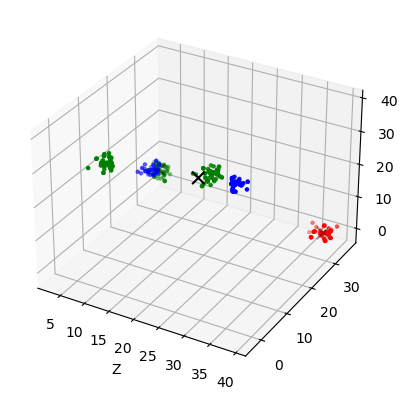

In [9]:
lbl, cluster_centers = k_means_shorter(data, 3)

plot_data_both_with_list_of_lists(data, lbl, cluster_centers)